<ROOT.TH1F object ("pValue") at 0x7f9dab4d3dc0>
<ROOT.TH1F object ("pValue") at 0x7f9dab4cc6b0>


'\n#-------LayerResiudals_Zoom----------\n#\ni_totalLayer=0\nmeans=[]\nMeanErrors=[]\nResidualRMS=[]\nResidualRMSError=[]\nyMin = -40\nyMax = 40\nplt.figure(1)\naxes = plt.gca()\nfor i_module in range(0, NModules):\n    line = [[i_module*NLayers+0.5,yMin], [i_module*NLayers+0.5, yMax]]\n    plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(line, 2))), color = \'green\')\nfor i_module in range(0, NModules):\n    for i_layer in range(0, NLayers):\n        name = "UV/h_residual_recon_M_"+str(i_module)+"_"+str(LayerNames[i_layer])\n        print(name)\n        t = f.Get(str(name))\n        mean = t.GetMean()*1e4 # cm to um \n        means.append(mean)  \n        print(mean)\n        meanError = t.GetMeanError()*1e4\n        MeanErrors.append(meanError)\n        RMS = t.GetRMS()*1e4\n        print(RMS)\n        ResidualRMS.append(RMS)  # cm to um \n        RMSError= t.GetRMSError()*1e4\n        ResidualRMSError.append(RMSError)\n        plt.errorbar(i_totalLayer+1, mean, y

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c_ver
Info in <TCanvas::Print>: png file Pval.png has been created


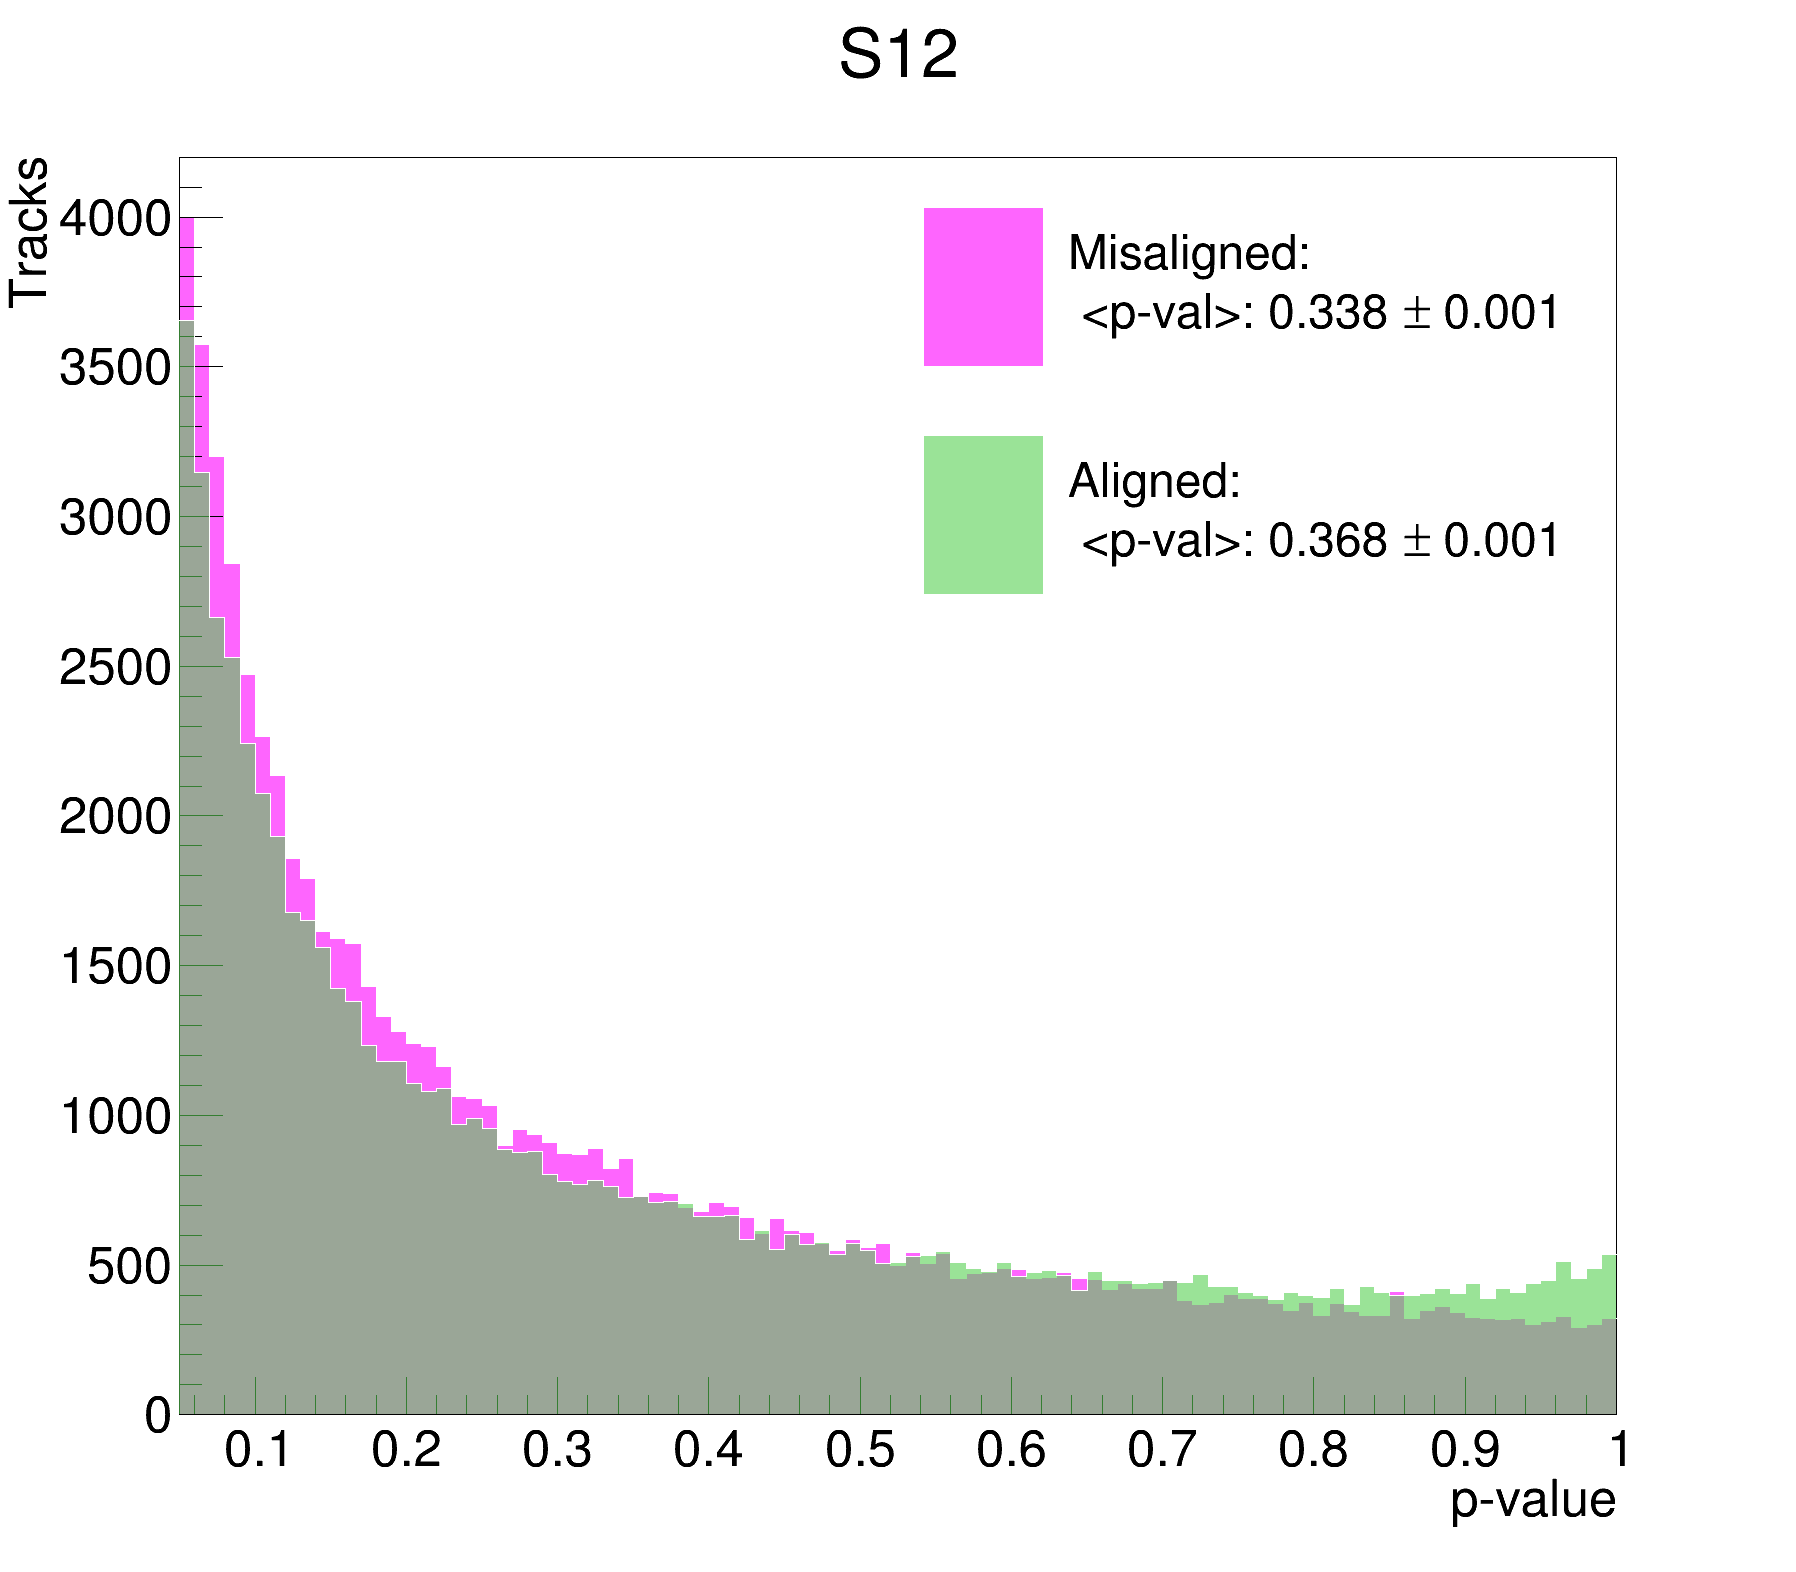

In [20]:
import sys
sys.path.append("/usr/local/Cellar/root/6.14.04_2/lib/root")
from ROOT import TFile, TStyle, TCanvas, gStyle, TF1
import matplotlib.pyplot as plt #for plotting 
import numpy as np  # smart arrays 
import itertools # smart lines 
import argparse, sys
from math import log10, floor
from matplotlib.ticker import MaxNLocator
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
from matplotlib._png import read_png
import subprocess
def round_sig(x, sig=2):
	return round(x, sig-int(floor(log10(abs(x))))-1)

from ROOT import TH1F, TH2F, TF1, TCanvas, TFile, gStyle, TPaveText, TLegend
from decimal import *
round_to = 3 
getcontext().prec = round_to

#Define constant paths and labels 
path = "TrackerAlignment/Tracks/pValue"
# path = "Tracks/h_chi2_circle_ndf"
scr_nominal= "/Users/gleb/software/alignTrack/mpIIDESY/DS0_Corr/S18/TrackerAlignment.root"
scr_shift = "/Users/gleb/software/alignTrack/mpIIDESY/DS0_Corr_Iter2/S18/TrackerAlignment.root"
stateN=2

#Containers to store histograms in orders as the names 
names = ["Misaligned", "Aligned"]
colors = [6, 8] #purple, green 
styles = [3001, 3002]

#Open TFiles
scrFile_nominal = TFile.Open(scr_nominal)
scrFile_shift = TFile.Open(scr_shift)
fileName = [scrFile_nominal, scrFile_shift] # nominal (0) and global shift (1)

##### Vertical ##########
         
#Make new canvas for plots 
c_ver = TCanvas("c_ver", "P-Values", 1800, 1600)
legend =  TLegend(0.5,0.6,0.88,0.89)

i_total = 0 # total counter 
# TODO use 2D arrays next time 
for i_state in range(0, stateN):

    #Get the TH2F 
    pVal = fileName[i_state].Get(str(path)) 
    
    print(pVal)
    pVal.Rebin(2)
    pVal.GetXaxis().SetRangeUser(0.05, 1.0) 
    pVal.GetYaxis().SetRangeUser(0.0, 4200.0) 
    pVal.SetTitle("")

    pVal.SetLineColor(0)
    pVal.SetFillColorAlpha(colors[i_total], 0.60)
    pVal.SetFillStyle(1)
    pVal.SetTitle("S12")
    pVal.GetXaxis().SetTitle("p-value")
#     pVal.GetXaxis().SetTitle("#chi^{2}/ndf")
    pVal.GetYaxis().SetTitle("Tracks")
    pVal.GetYaxis().SetTitleOffset(1.5);
    pVal.Draw("same")
    
    mean=Decimal(pVal.GetMean())/Decimal(1)
    mean_error = round(Decimal(pVal.GetMeanError())/Decimal(1), round_to)

    legenValue1 = "#splitline{"+str(names[i_total])+":}{ <p-val>: "+str(mean)+" #pm "+str(mean_error)+"}"
    #legenValue1 = "#splitline{"+str(names[i_total])+":}{ <#chi^{2}/ndf>: "+str(mean)+" #pm "+str(mean_error)+"}"
    legend.AddEntry(pVal, str(legenValue1), "f")
    legend.Draw("same")

    i_total+=1 


gStyle.SetOptStat(0) 
gStyle.SetOptFit(0)
gStyle.SetLegendBorderSize(0)
gStyle.SetLegendTextSize(0.033)
c_ver.Draw()
c_ver.Print("Pval.png")
# c_ver.Print("Chi2.png")

# ###### LAYERS ##############
# NModules=4
# NLayers=4 # per modules
# NTotalLayers=NModules*NLayers
# LayerNames = ["U0", "U1", "V0", "V1"]

# # f = TFile.Open("Tracker_fixMis.root")
# f = TFile.Open("Tracker.root")

'''
#-------LayerResiudals_Zoom----------
#
i_totalLayer=0
means=[]
MeanErrors=[]
ResidualRMS=[]
ResidualRMSError=[]
yMin = -40
yMax = 40
plt.figure(1)
axes = plt.gca()
for i_module in range(0, NModules):
    line = [[i_module*NLayers+0.5,yMin], [i_module*NLayers+0.5, yMax]]
    plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(line, 2))), color = 'green')
for i_module in range(0, NModules):
    for i_layer in range(0, NLayers):
        name = "UV/h_residual_recon_M_"+str(i_module)+"_"+str(LayerNames[i_layer])
        print(name)
        t = f.Get(str(name))
        mean = t.GetMean()*1e4 # cm to um 
        means.append(mean)  
        print(mean)
        meanError = t.GetMeanError()*1e4
        MeanErrors.append(meanError)
        RMS = t.GetRMS()*1e4
        print(RMS)
        ResidualRMS.append(RMS)  # cm to um 
        RMSError= t.GetRMSError()*1e4
        ResidualRMSError.append(RMSError)
        plt.errorbar(i_totalLayer+1, mean, yerr=meanError, color="red") 
        plt.plot(i_totalLayer+1, mean, marker="_", color="red")
        i_totalLayer+=1

line = [[0.5,0.0], [i_totalLayer+1, 0.0]]
plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(line, 2))), color = 'grey')
axes.set_xlim(0.5, NTotalLayers+1)
axes.set_ylim(yMin, yMax)
plt.title("UV Residuals Mean", fontsize=18)
plt.ylabel("Residual Mean [um]", fontsize=18)
plt.xlabel("Layer", fontsize=18)
plt.savefig("Residuals_Mean_Zoom_2D_fixMis.png", dpi=600)
plt.tight_layout()

#----Layer Residual SD 
i_totalLayer=0
yMin = 120
yMax = 210
means=[]
plt.figure(81)
axes = plt.gca()
for i_module in range(0, NModules):
    line = [[i_module*NLayers+0.5,yMin], [i_module*NLayers+0.5, yMax]]
    plt.plot(*zip(*itertools.chain.from_iterable(itertools.combinations(line, 2))), color = 'green')
for i_module in range(0, NModules):
    for i_layer in range(0, NLayers):
        plt.errorbar(i_totalLayer+1, ResidualRMS[i_totalLayer], yerr=ResidualRMSError[i_totalLayer], color="red") 
        plt.plot(i_totalLayer+1, ResidualRMS[i_totalLayer], marker="_", color="red")
        means.append(ResidualRMS[i_totalLayer])
        i_totalLayer+=1


axes.set_xlim(0.5, NTotalLayers+1)
axes.set_ylim(yMin, yMax)
plt.title("UV Residual SD", fontsize=20)
plt.ylabel("Residual SD [um]", fontsize=18)
plt.xlabel("Layer", fontsize=20)
plt.savefig("Residuals_SD_2D_fixMis.png", dpi=600)
plt.tight_layout()
#######################################################
'''